# Additional Measures

- Sevcik Fractal Dimension (['sevcik fractal dimension', 'sevcik dimension'])

In [1]:
from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims, run_sims_load
from apm.methods import sevcik_fd
from apm.methods.settings import SFD_PARAMS
from apm.plts.settings import EXT, COLORS
from apm.plts.sims import plot_sims, plot_ap_sims, plot_pe_sims
from apm.sim.settings import (N_SIMS, EXP, EXPS, KNEES, FREQS, POWERS, BWS,
                              SIM_PARAMS_AP, SIM_PARAMS_COMB, SIM_PARAMS_KNEE)
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

## Settings

In [3]:
# Set the random seed
set_random_seed(111)

In [4]:
# Settings for saving figures
SAVE_FIG = False
FIGPATH = APMDB().figs_path / 'XX'

In [5]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

## Sevcik Fractal Dimension

In [6]:
# Check Sevcik fractal dimension measures on example signals
print('Sevcik fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(sevcik_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(sevcik_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(sevcik_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(sevcik_fd(SIG_KN)))

Sevcik fractal dimension:
  powerlaw: 	 1.5481
  osc:      	 1.6205
  combined: 	 1.5883
  knee:     	 1.6649


In [7]:
sfd_sims_exp, sfd_sims_exp_var = run_sims(\
    sim_powerlaw, SIM_PARAMS_AP, sevcik_fd, SFD_PARAMS, 'update_exp', EXPS, N_SIMS)

In [8]:
sfd_sims_comb, sfd_sims_comb_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sevcik_fd, SFD_PARAMS, 'update_comb_exp', EXPS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


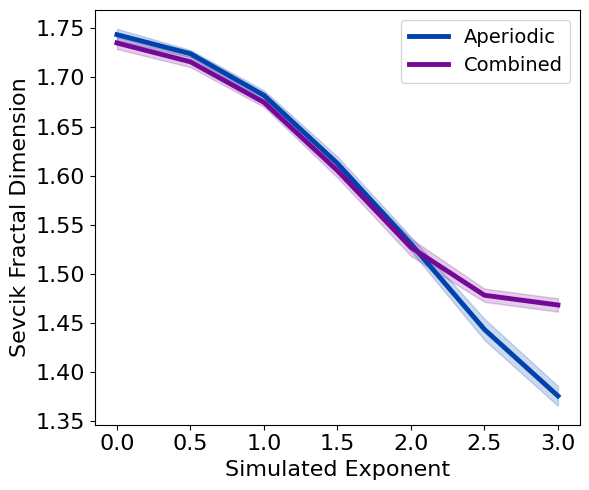

In [9]:
# Plot Sevcik fractal dimension estimates across aperiodic variations
plot_ap_sims(sfd_sims_exp, sfd_sims_exp_var, sfd_sims_comb, sfd_sims_comb_var,
             'Sevcik Fractal Dimension', save_fig=SAVE_FIG, file_name='sfd_ap' + EXT, file_path=FIGPATH)

In [10]:
sfd_sims_freq, sfd_sims_freq_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sevcik_fd, SFD_PARAMS, 'update_freq', FREQS, N_SIMS)

In [11]:
sfd_sims_pow, sfd_sims_pow_var = run_sims(\
    sim_combined, SIM_PARAMS_COMB, sevcik_fd, SFD_PARAMS, 'update_pow', POWERS, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


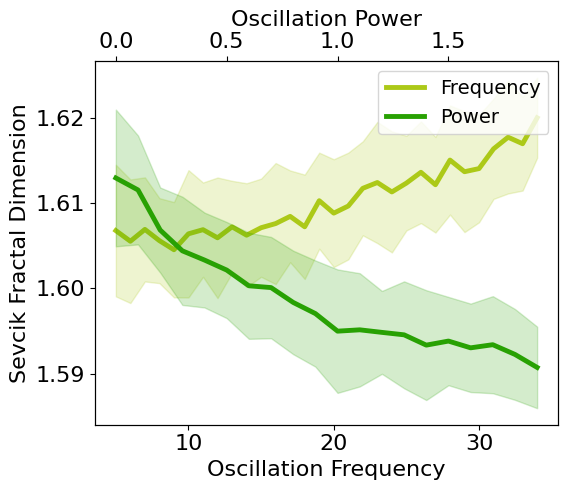

In [12]:
# Plot Sevcik fractal dimension estimates across periodic variations
plot_pe_sims(sfd_sims_freq, sfd_sims_freq_var, sfd_sims_pow, sfd_sims_pow_var,
             'Sevcik Fractal Dimension', save_fig=SAVE_FIG, file_name='sfd_pe' + EXT, file_path=FIGPATH)

In [13]:
sfd_sims_knee, sfd_sims_knee_var = run_sims(\
    sim_synaptic_current, SIM_PARAMS_KNEE, sevcik_fd, SFD_PARAMS, 'update_knee', KNEES, N_SIMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


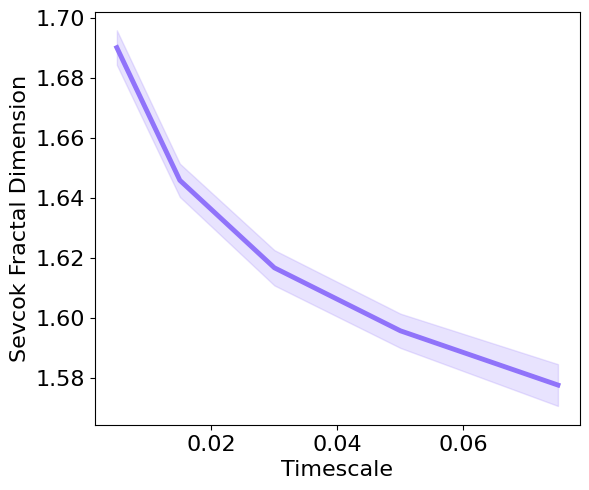

In [14]:
# Plot Sevcik fractal dimension across different timescales
plot_sims(KNEES, sfd_sims_knee, sfd_sims_knee_var,
          'Timescale', 'Sevcok Fractal Dimension', COLORS['KN'],
          save_fig=SAVE_FIG, file_name='sfd_knee' + EXT, file_path=FIGPATH)

In [15]:
sfd_sims_bw, sfd_sims_bw_var = run_sims_load(\
    SIMPATH / 'ts_sims_comb_bw', sevcik_fd, SFD_PARAMS)

/Users/tom/opt/anaconda3/envs/apm/lib/python3.9/site-packages/neurodsp/plts/style.py:128: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


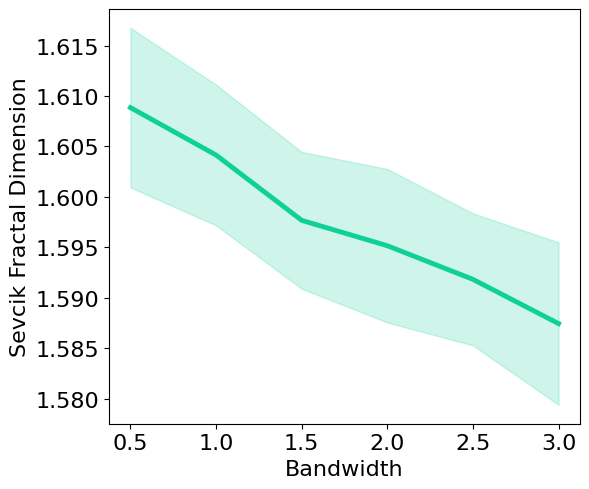

In [16]:
# Plot Sevcik fractal dimension across peak bandwidth
plot_sims(BWS, sfd_sims_bw, sfd_sims_bw_var,
          'Bandwidth', 'Sevcik Fractal Dimension', COLORS['BW'],
          save_fig=SAVE_FIG, file_name='sfd_bw' + EXT, file_path=FIGPATH)